In [4]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [5]:
riders = pd.read_pickle("clean-data/riders.pkl")
riders.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,396,2946,2298,14.0,1159
1,479,360,951,13.5,176
2,648,1746,821,14.3,466
3,753,314,980,12.5,75
4,335,536,1113,13.7,156


In [6]:
train = pd.read_pickle("clean-data/train.pkl")
train.head()

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time
0,4211,633,3,Business,9,5,34546,9,5,34810,...,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,432,745,264,2840
1,25375,2285,3,Personal,12,5,40576,12,5,41001,...,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,856,1993,425,1248
2,1899,265,3,Business,30,2,45565,30,2,45764,...,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,155,455,199,619
3,9336,1402,3,Business,15,5,33934,15,5,33965,...,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,855,1341,31,1021
4,27883,1737,1,Personal,13,1,35718,13,1,35778,...,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,770,1214,60,545


In [7]:
# Combining riders and train into one df
train = train.merge(riders, on="rider_id")

In [8]:
# Dropping date/time columns
dropped = ["placement_date", "placement_weekday", "placement_time",
           "confirm_date", "confirm_weekday", "confirm_time",
           "arrival_pickup_date", "arrive_pickup_weekday", "arrive_time",
           "pickup_date", "pickup_weekday", "pickup_time",
           "arrival_dest_date", "arrival_dest_weekday", "arrival_dest_time"]

train.drop(columns=dropped, inplace=True)

In [9]:
train.head()

,order_id,user_id,platform,personal_or_business,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings
0,4211,633,3,Business,4,20.4,-1.317755,36.830370,-1.300406,36.829741,432,745,264,2840,1637,1309,13.8,549
1,27440,2642,3,Personal,20,24.5,-1.326774,36.787807,-1.356237,36.904295,432,2886,13,1927,1637,1309,13.8,549
2,14170,3339,3,Business,6,24.7,-1.255189,36.782203,-1.273412,36.818206,432,2615,1268,1219,1637,1309,13.8,549
3,21727,3523,3,Personal,18,15.2,-1.290315,36.757377,-1.223520,36.802061,432,2986,19,1577,1637,1309,13.8,549
4,8301,87,2,Personal,7,19.2,-1.273524,36.799220,-1.300431,36.752427,432,1602,86,1036,1637,1309,13.8,549


In [10]:
# Extracting relevant columns for PCA

relevant_cols = ["distance", "temperature", "placement_to_confirm_time", 
                 "confirm_to_pickup_time", "no_of_orders", "age", "average_rating",
                 "no_of_ratings"]
train_pca = train[relevant_cols]
train_pca

,distance,temperature,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings
0,4,20.4,264,2840,1637,1309,13.8,549
1,20,24.5,13,1927,1637,1309,13.8,549
2,6,24.7,1268,1219,1637,1309,13.8,549
3,18,15.2,19,1577,1637,1309,13.8,549
4,7,19.2,86,1036,1637,1309,13.8,549
...,...,...,...,...,...,...,...,...
21191,3,22.2,1361,1230,5770,1793,14.2,2205
21192,6,19.9,850,1406,102,873,13.7,32
21193,7,19.0,641,3356,5,105,0.0,0
21194,2,27.0,48,940,5,448,15.0,2


In [11]:
# Standardizing numerical variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized = pd.DataFrame(scaler.fit_transform(train_pca))
standardized.head()

,0,1,2,3,4,5,6,7
0,-0.971381,-0.887436,-0.107959,1.348181,-0.035088,0.501417,-0.090079,0.516219
1,1.850969,0.385175,-0.257204,0.415074,-0.035088,0.501417,-0.090079,0.516219
2,-0.618587,0.447253,0.489019,-0.308518,-0.035088,0.501417,-0.090079,0.516219
3,1.498175,-2.501479,-0.253637,0.057366,-0.035088,0.501417,-0.090079,0.516219
4,-0.442191,-1.259907,-0.213798,-0.495548,-0.035088,0.501417,-0.090079,0.516219


In [12]:
# Running PCA

from sklearn.decomposition import PCA
pca = PCA()
pc_scores = pd.DataFrame(pca.fit_transform(standardized), 
                         columns = ['PC'+str(i) for i in np.arange(1,standardized.shape[1]+1)])
pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.473153,0.280127,-0.237710,0.594922,-0.734770,-1.632114,0.100592,-0.401288
1,0.620531,1.506519,-0.507940,-0.517865,0.413051,0.878045,0.251019,-0.393323
2,0.532004,-0.493915,0.798359,0.154547,0.111239,-0.082582,0.240860,-0.422854
3,0.629128,0.786396,-2.134154,1.070596,-1.274667,0.814203,0.056424,-0.301489
4,0.547350,-0.717573,-0.642367,0.497750,-0.989003,-0.023245,0.126442,-0.363146
...,...,...,...,...,...,...,...,...
21191,4.935117,-1.071838,0.431335,0.651437,-0.032570,-0.684997,-1.762486,-1.384617
21192,-1.176363,-0.468898,-0.239224,0.802748,-0.808033,-0.222231,0.429588,-0.165888
21193,-2.636207,5.576044,6.996962,-1.147592,-12.004859,1.417671,-2.063635,-0.334274
21194,-1.580988,-1.553436,0.402297,-0.599810,1.274050,-0.631754,0.225739,-0.189758


Text(0.5, 1.0, 'Scree Plot')

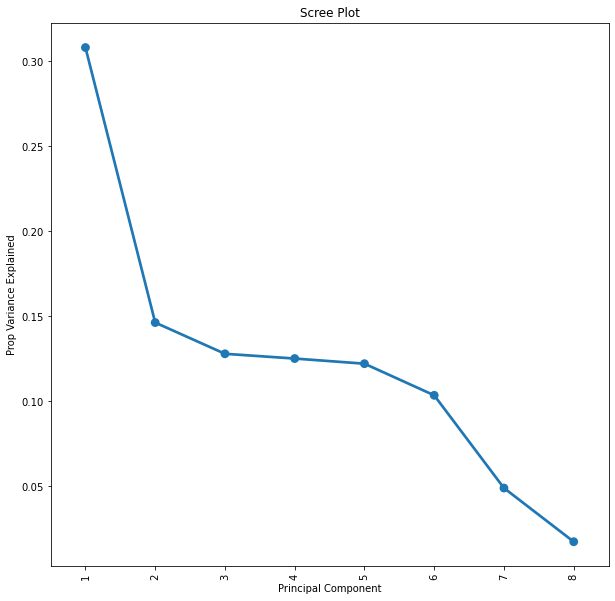

In [13]:
# Determining optimal number of components

scree_data = pd.DataFrame({'Principal Component':np.arange(1,standardized.shape[1]+1), 'Prop Variance Explained': pca.explained_variance_ratio_})

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.pointplot(x="Principal Component", y="Prop Variance Explained", data=scree_data).set_title('Scree Plot')

In [14]:
# 83% of variance is in the first 5 PCs

pca.explained_variance_ratio_[:5].sum()

0.829765824528123

In [15]:
train_pcs = pc_scores.iloc[:,:5]
train_pcs.head()

,PC1,PC2,PC3,PC4,PC5
0,0.473153,0.280127,-0.237710,0.594922,-0.734770
1,0.620531,1.506519,-0.507940,-0.517865,0.413051
2,0.532004,-0.493915,0.798359,0.154547,0.111239
3,0.629128,0.786396,-2.134154,1.070596,-1.274667
4,0.547350,-0.717573,-0.642367,0.497750,-0.989003


In [16]:
# Creating dummy variables for platforms 1, 2, 3. They will all be 0 for
# platform 4.

for i in range(1, 4):
    plat_str = "platform" + str(i)
    train[plat_str] = 0
    train.loc[train.platform == i, plat_str] = 1
    train_pcs[plat_str] = train[plat_str]

train_pcs

<ipython-input-16-7d59700b30dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pcs[plat_str] = train[plat_str]


,PC1,PC2,PC3,PC4,PC5,platform1,platform2,platform3
0,0.473153,0.280127,-0.237710,0.594922,-0.734770,0,0,1
1,0.620531,1.506519,-0.507940,-0.517865,0.413051,0,0,1
2,0.532004,-0.493915,0.798359,0.154547,0.111239,0,0,1
3,0.629128,0.786396,-2.134154,1.070596,-1.274667,0,0,1
4,0.547350,-0.717573,-0.642367,0.497750,-0.989003,0,1,0
...,...,...,...,...,...,...,...,...
21191,4.935117,-1.071838,0.431335,0.651437,-0.032570,0,0,1
21192,-1.176363,-0.468898,-0.239224,0.802748,-0.808033,0,0,1
21193,-2.636207,5.576044,6.996962,-1.147592,-12.004859,0,0,1
21194,-1.580988,-1.553436,0.402297,-0.599810,1.274050,0,0,1


In [17]:
# Creating dummy variable for personal_or_business (1 if personal 0 if business)

train["personal"] = 0
train.loc[train.personal_or_business == "Personal", "personal"] = 1
train_pcs["personal"] = train["personal"]

train_pcs

,PC1,PC2,PC3,PC4,PC5,platform1,platform2,platform3,personal
0,0.473153,0.280127,-0.237710,0.594922,-0.734770,0,0,1,0
1,0.620531,1.506519,-0.507940,-0.517865,0.413051,0,0,1,1
2,0.532004,-0.493915,0.798359,0.154547,0.111239,0,0,1,0
3,0.629128,0.786396,-2.134154,1.070596,-1.274667,0,0,1,1
4,0.547350,-0.717573,-0.642367,0.497750,-0.989003,0,1,0,1
...,...,...,...,...,...,...,...,...,...
21191,4.935117,-1.071838,0.431335,0.651437,-0.032570,0,0,1,0
21192,-1.176363,-0.468898,-0.239224,0.802748,-0.808033,0,0,1,1
21193,-2.636207,5.576044,6.996962,-1.147592,-12.004859,0,0,1,0
21194,-1.580988,-1.553436,0.402297,-0.599810,1.274050,0,0,1,0


In [18]:
# Adding back output variable

train_pcs["pickup_to_arrival_time"] = train["pickup_to_arrival_time"]
train_pcs

,PC1,PC2,PC3,PC4,PC5,platform1,platform2,platform3,personal,pickup_to_arrival_time
0,0.473153,0.280127,-0.237710,0.594922,-0.734770,0,0,1,0,745
1,0.620531,1.506519,-0.507940,-0.517865,0.413051,0,0,1,1,2886
2,0.532004,-0.493915,0.798359,0.154547,0.111239,0,0,1,0,2615
3,0.629128,0.786396,-2.134154,1.070596,-1.274667,0,0,1,1,2986
4,0.547350,-0.717573,-0.642367,0.497750,-0.989003,0,1,0,1,1602
...,...,...,...,...,...,...,...,...,...,...
21191,4.935117,-1.071838,0.431335,0.651437,-0.032570,0,0,1,0,919
21192,-1.176363,-0.468898,-0.239224,0.802748,-0.808033,0,0,1,1,2331
21193,-2.636207,5.576044,6.996962,-1.147592,-12.004859,0,0,1,0,2418
21194,-1.580988,-1.553436,0.402297,-0.599810,1.274050,0,0,1,0,717


In [19]:
train_pcs.to_pickle("clean-data/train-pca.pkl")